In [1]:
import time
import numpy as np
import theano
import theano.tensor as T
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import KFold

np.random.seed(10)

In [5]:
# scale and normalize input data
def scale(X, X_min, X_max):
    return (X - X_min)/(X_max - X_min)

def shuffle_data (samples, labels):
    idx = np.arange(samples.shape[0])
    np.random.shuffle(idx)
    #print  (samples.shape, labels.shape)
    samples, labels = samples[idx], labels[idx]
    return samples, labels

In [6]:
#read and divide data into test and train sets
cal_housing = np.loadtxt('cal_housing.data', delimiter=',')
X_data, Y_data = cal_housing[:,:8], cal_housing[:,-1]
Y_data = (np.asmatrix(Y_data)).transpose()

X_data, Y_data = shuffle_data(X_data, Y_data)

#separate train and test data
m = 3*X_data.shape[0] // 10
testX, testY = X_data[:m],Y_data[:m]
trainX, trainY = X_data[m:], Y_data[m:]

# scale and normalize data
trainX_max, trainX_min =  np.max(trainX, axis=0), np.min(trainX, axis=0)
testX_max, testX_min =  np.max(testX, axis=0), np.min(testX, axis=0)

trainX = scale(trainX, trainX_min, trainX_max)
testX = scale(testX, trainX_min, trainX_max)

# trainX_mean, trainX_std = np.mean(trainX, axis=0), np.std(trainX, axis=0)
# testX_mean, testX_std = np.mean(testX, axis=0), np.std(testX, axis=0)

# trainX = normalize(trainX, trainX_mean, trainX_std)
# testX = normalize(testX, testX_mean, testX_std)

print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)


(14448, 8) (14448, 1)
(6192, 8) (6192, 1)


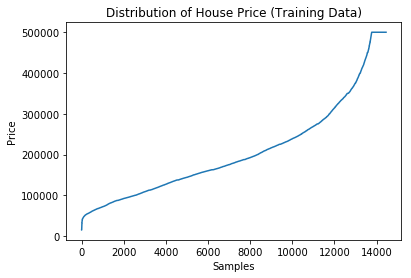

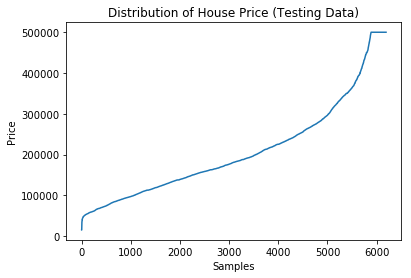

In [49]:
a = np.array(trainY).flatten()
a.sort()
plt.plot(a)
plt.title('Distribution of House Price (Training Data)')
plt.ylabel('Price')
plt.xlabel('Samples')
plt.savefig('./stats/price_dis_training.png')
plt.show()

a = np.array(testY).flatten()
a.sort()
plt.plot(a)
plt.title('Distribution of House Price (Testing Data)')
plt.ylabel('Price')
plt.xlabel('Samples')
plt.savefig('./stats/price_dis_testing.png')
plt.show()

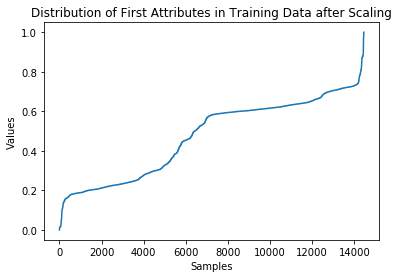

In [48]:
a = np.array(trainX[:,0]).flatten()
a.sort()
plt.plot(a)
plt.title('Distribution of First Attributes in Training Data after Scaling')
plt.ylabel('Values')
plt.xlabel('Samples')
plt.savefig('./stats/feature_dis.png')
plt.show()